In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 

##1 Introduction: 

#Clustering: Customer Segment Analysis 


To cluster customers into segments to optimize the significance of each customer to the business.
This may help modify products according to customers specific needs and help businesses address the concerns of different user cohorts.

Datasource: https://www.kaggle.com/code/imakash3011/customer-analysis-eda-report-clustering/data


In [432]:
#import all needed libraries to start
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal


import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [433]:
#load dataset

main_df = pd.read_csv('marketing_campaign 2.csv', sep="\t")
df = main_df.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [434]:
#2 EDA & exploration: 
#i. data exploration on removing NaN, datatype  & variables cleansing

In [435]:
#check and prep - perform EDA
#check for null
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [436]:
#income column has null values, check values 
df[pd.isnull(df['Income'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [437]:
#drop na, save to new df, new df size = 2216
df2 = df.dropna().reset_index(drop=True)
df2.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [438]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2212,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2213,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2214,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [439]:
#drop any other columns not needed / add useful columns - perform EDA on product/user/promotion/platform attributes
#add columns : total purchased per users (product)
df2['total_spent'] = df2['MntWines'] + df2['MntFruits'] + df2['MntMeatProducts'] + df2['MntFishProducts'] + df2['MntSweetProducts'] + df2['MntGoldProds']

In [440]:
print(df2[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','total_spent']])

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2211       709         43              182               42               118   
2212       406          0               30                0                 0   
2213       908         48              217               32                12   
2214       428         30              214               80                30   
2215        84          3               61                2                 1   

      MntGoldProds  total_s

In [441]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [442]:
#user attribute EDA
print("Total categories in the feature Marital_Status:\n", df2["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df2["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [443]:
#add age as an attribute
df2['Age'] = 2022 - df['Year_Birth']
print(df2[['Age', 'Year_Birth']])

      Age  Year_Birth
0      65        1957
1      68        1954
2      57        1965
3      38        1984
4      41        1981
...   ...         ...
2211   41        1967
2212   72        1946
2213   27        1981
2214   46        1956
2215   68        1954

[2216 rows x 2 columns]


In [444]:
#combine attributes for household size
#household size is determined by: Marital_Status, Kidhome, Teenhome
#print(df2['Marital_Status'].unique())
df2['Marital_Status'] = df2['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
#print(df2['Marital_Status'].unique())
df2['Children'] = df2['Kidhome']+df2['Teenhome']
df2['household_size'] = df2['Children'] + df2['Marital_Status'].replace({'Alone':1, 'Partner':2})
print(df2[['Marital_Status', 'Children', 'household_size']])

     Marital_Status  Children  household_size
0             Alone         0               1
1             Alone         2               3
2           Partner         0               2
3           Partner         1               3
4           Partner         1               3
...             ...       ...             ...
2211        Partner         1               3
2212        Partner         3               5
2213          Alone         0               1
2214        Partner         1               3
2215        Partner         2               4

[2216 rows x 3 columns]


In [445]:
df2["Dt_Customer"] = pd.to_datetime(df2["Dt_Customer"])
dates = []
for i in df2["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [446]:
#users' lifetime
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df2["lifetime"] = days
df2["lifetime"] = pd.to_numeric(df2["lifetime"], errors="coerce")

In [447]:
#df2['lifetime'] = pd.to_datetime(df2["lifetime"])
print(df2[['Dt_Customer', 'lifetime']])

     Dt_Customer           lifetime
0     2012-04-09  83894400000000000
1     2014-08-03  10800000000000000
2     2013-08-21  40780800000000000
3     2014-10-02   5616000000000000
4     2014-01-19  27734400000000000
...          ...                ...
2211  2013-06-13  46742400000000000
2212  2014-10-06   5270400000000000
2213  2014-01-25  27216000000000000
2214  2014-01-24  27302400000000000
2215  2012-10-15  67564800000000000

[2216 rows x 2 columns]


In [448]:
# add total promo 
df2["total_promo"] = df2["AcceptedCmp1"]+ df2["AcceptedCmp2"]+ df2["AcceptedCmp3"]+ df2["AcceptedCmp4"]+ df2["AcceptedCmp5"]

In [449]:
# add total promo 
df2["total_purchases"] = df2["NumWebPurchases"]+ df2["NumCatalogPurchases"]+ df2["NumStorePurchases"]

In [450]:
# avg spent / purchase
df2["avg_spent"] = df2["total_spent"] / (df2["total_purchases"]+df2["NumDealsPurchases"])

In [451]:
print(df2['avg_spent'].unique())

[64.68        4.5        36.95238095 ... 65.31578947 36.65217391
 15.63636364]


In [452]:
print(df2['Education'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [453]:
#simplify purchase category
df2=df2.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [454]:
X = df2.copy()

In [455]:
#finalize columns needed, drop redudant columns:
to_drop = ["Marital_Status",
           "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID", "Kidhome", "Teenhome", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5",
          "Response", "Complain", "lifetime"
          ,"Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold", "Recency", "total_promo", "Education",
          "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"
          #,  "Children"
          #, "Complain"
          ]
X = X.drop(to_drop, axis=1)

In [456]:
#attributes included for k-means
X.columns

Index(['Income', 'NumDealsPurchases', 'NumWebVisitsMonth', 'total_spent',
       'Age', 'Children', 'household_size', 'total_purchases', 'avg_spent'],
      dtype='object')

In [457]:
#check for outlier
X.describe()

,Income,NumDealsPurchases,NumWebVisitsMonth,total_spent,Age,Children,household_size,total_purchases,avg_spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,2.323556,5.319043,607.075361,53.225632,0.947202,2.592509,12.557310,inf
std,25173.076661,1.923716,2.425359,602.900476,11.986395,0.749062,0.905722,7.204611,NaN
min,1730.000000,0.000000,0.000000,5.000000,26.000000,0.000000,1.000000,0.000000,0.533333
25%,35303.000000,1.000000,3.000000,69.000000,45.000000,0.000000,2.000000,6.000000,9.714286
50%,51381.500000,2.000000,6.000000,396.500000,52.000000,1.000000,3.000000,12.000000,23.535714
75%,68522.000000,3.000000,7.000000,1048.000000,63.000000,1.000000,3.000000,18.000000,45.580000
max,666666.000000,15.000000,20.000000,2525.000000,129.000000,3.000000,5.000000,32.000000,inf


In [458]:
##Get list of categorical variables
s = (X.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


In [459]:
LE=LabelEncoder()
for i in object_cols:
    X[i]=X[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [460]:
#remove age > 90
X = X[(X["Age"]<90)]

#remove income > 75%
X = X[(X["Income"]<68000)]


#remove avg spent > 75%
X = X[(X["avg_spent"]<45)]

In [461]:
#remove age > 90
df2 = df2[(df2["Age"]<90)]

#remove income > 75%
df2 = df2[(df2["Income"]<68000)]


#remove avg spent > 75%
df2= df2[(df2["avg_spent"]<45)]

In [462]:
X.describe()

,Income,NumDealsPurchases,NumWebVisitsMonth,total_spent,Age,Children,household_size,total_purchases,avg_spent
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,41099.705921,2.641447,6.186842,277.665789,53.282895,1.193421,2.849342,9.689474,16.933444
std,14646.966710,1.994328,1.909220,306.652622,11.736473,0.677453,0.837918,6.266489,10.861371
min,1730.000000,0.000000,0.000000,8.000000,26.000000,0.000000,1.000000,0.000000,0.533333
25%,30371.000000,1.000000,5.000000,49.000000,45.000000,1.000000,2.000000,5.000000,7.600000
50%,41017.000000,2.000000,6.000000,128.500000,52.000000,1.000000,3.000000,7.000000,14.209135
75%,53158.500000,3.000000,8.000000,433.250000,63.000000,2.000000,3.000000,14.000000,25.000000
max,67911.000000,15.000000,20.000000,1730.000000,81.000000,3.000000,5.000000,32.000000,44.423077


<AxesSubplot:>

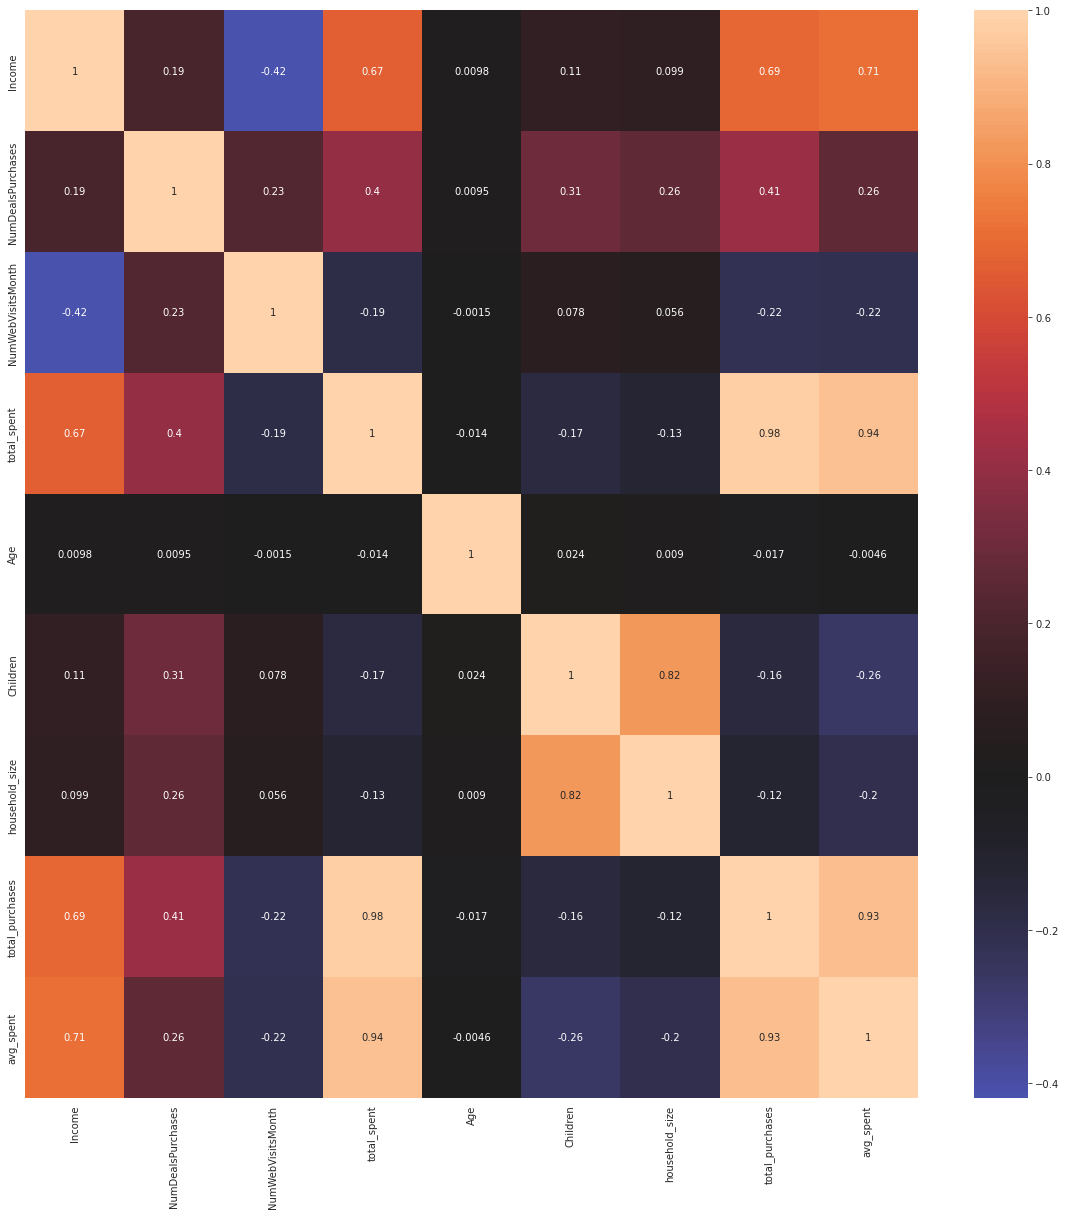

In [463]:
#check for correlation 
corrmat= X.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

#notes on correlation:
#1 income and num of visit per month is negatively correlated
#2 high correlation between wine, fruit, meat
#3 low correlation of complain to any of the purchases (or income)
# Finding the correlation between the feature column
#typically 0.5 - 1.0 is high correlation, income has the highest correlation with the cluster

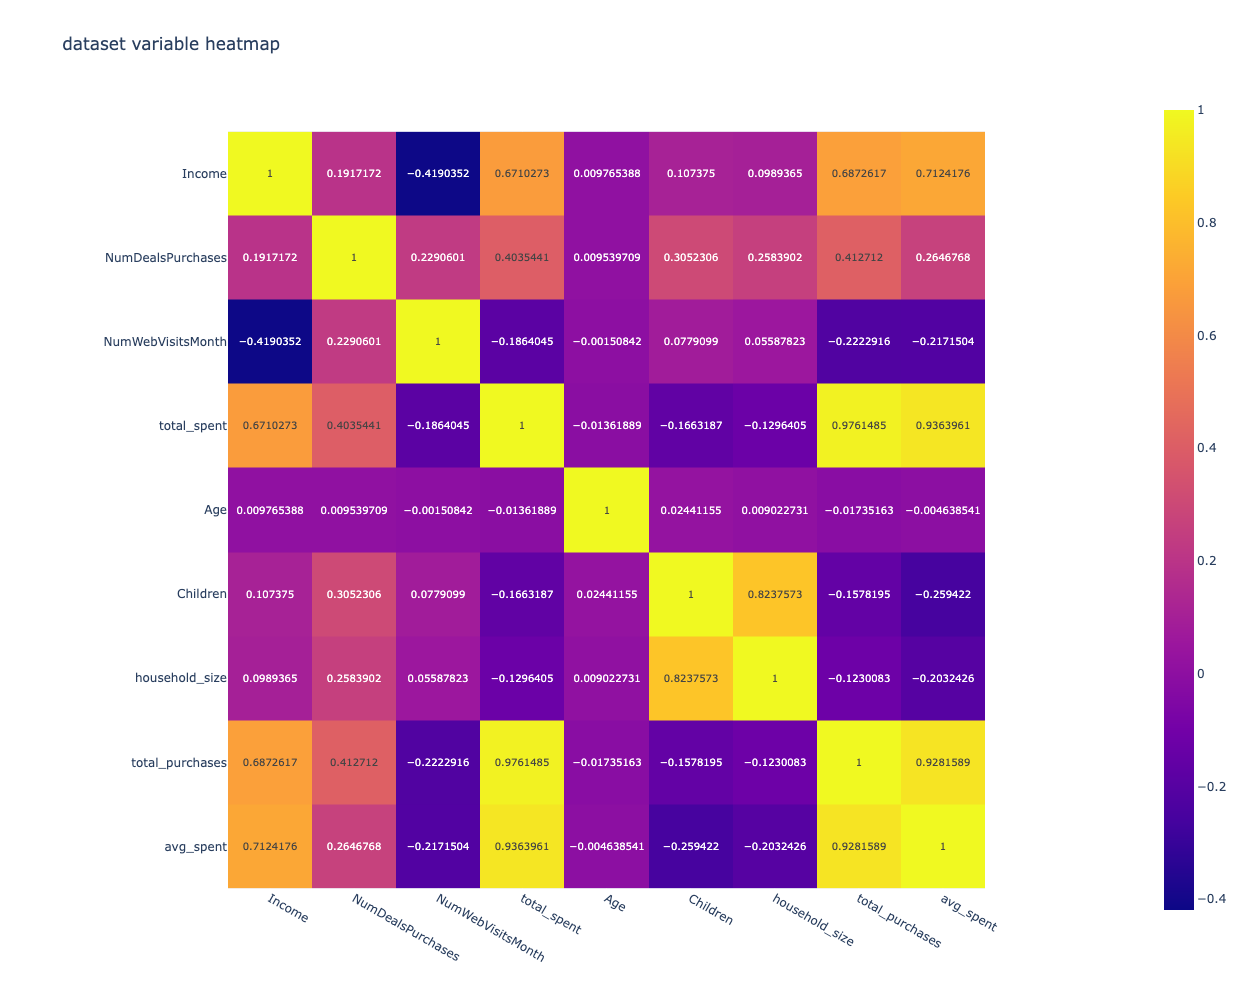

In [397]:
fig = px.imshow(
   corrmat,
    width=1000, height=1000, text_auto = True,
    title = "dataset variable heatmap"
)

fig.write_json('cluster_heatmap.json')
fig.show()

In [464]:

X = X.drop(['avg_spent', 'Children'], axis=1)


In [465]:
km = KMeans(n_clusters = 5, random_state = 1)
km.fit(X)

KMeans(n_clusters=5, random_state=1)

In [466]:
# After we fit the data each observation is labeled with the cluster # it belongs to.
# .labels_ is an attribute of the model we can access.
labels = km.labels_

In [467]:
# add the labels to our dataframe
X['cluster'] = km.labels_
X.sort_values('cluster').head()

,Income,NumDealsPurchases,NumWebVisitsMonth,total_spent,Age,household_size,total_purchases,cluster
113,19510.0,2,7,30,31,4,4,0
1844,11448.0,1,6,14,57,1,3,0
1052,16860.0,3,7,38,73,4,5,0
2141,15253.0,2,7,29,51,2,4,0
372,10245.0,3,5,41,52,2,5,0


In [468]:
# .cluster_centers_ is an attribute of the fitted model.
km.cluster_centers_

array([[1.55938356e+04, 2.48630137e+00, 7.23972603e+00, 6.84315068e+01,
        5.29109589e+01, 2.53424658e+00, 5.39726027e+00],
       [6.10591420e+04, 3.14511041e+00, 4.86435331e+00, 6.58867508e+02,
        5.32902208e+01, 2.82334385e+00, 1.75173502e+01],
       [3.80131175e+04, 2.44250000e+00, 6.54000000e+00, 1.53837500e+02,
        5.26950000e+01, 2.97000000e+00, 7.09000000e+00],
       [4.92572330e+04, 3.17329545e+00, 5.93465909e+00, 3.37514205e+02,
        5.38380682e+01, 2.99431818e+00, 1.11846591e+01],
       [2.71977443e+04, 1.83934426e+00, 6.88524590e+00, 7.49508197e+01,
        5.35836066e+01, 2.70163934e+00, 5.29180328e+00]])

In [469]:
km.inertia_

18500430205.06192

In [470]:
# generate the mean values for each feature by cluster
#before scaling: income has a wider range of values in comparison to other variables, if unscaled, our cluster will be more dependent on the income variable vs other variables
X.groupby('cluster').mean()

,Income,NumDealsPurchases,NumWebVisitsMonth,total_spent,Age,household_size,total_purchases
cluster,,,,,,,
0,15593.835616,2.486301,7.239726,68.431507,52.910959,2.534247,5.397260
1,61077.816456,3.142405,4.857595,659.629747,53.268987,2.819620,17.528481
2,38013.117500,2.442500,6.540000,153.837500,52.695000,2.970000,7.090000
3,49273.949008,3.175637,5.937677,337.742210,53.855524,2.997167,11.192635
4,27197.744262,1.839344,6.885246,74.950820,53.583607,2.701639,5.291803


In [471]:
X = X.drop(['cluster'], axis=1)

In [472]:
# income data 'weighs' more than other 
# Scale the data
# instantiate the scaler
scaler = StandardScaler()

# Fit transform the data
X_scaled = scaler.fit_transform(X)

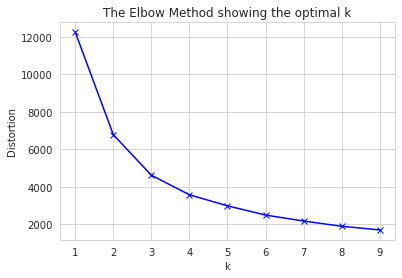

In [473]:

#elbow method to find optimized k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [474]:
# try using inertia-curve

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

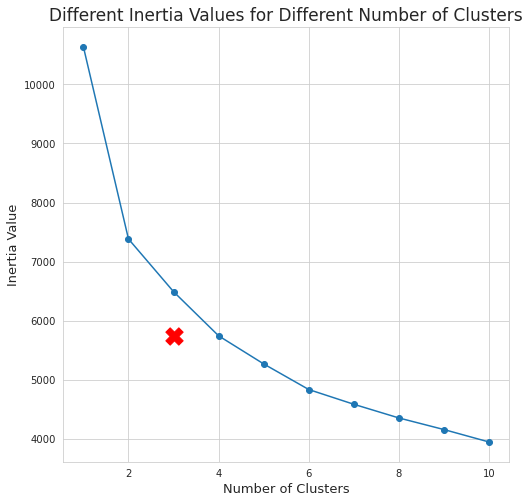

In [475]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(X_scaled)
    inertia_list.append(kmeans_model.inertia_)
    
# plot the inertia curve
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.scatter(3, inertia_list[3], marker="X", s=300, c="r")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

In [476]:
#retry with scaled data
km = KMeans(n_clusters = 3, random_state = 1)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=1)

In [477]:
labels_scaled = km.labels_
centroids = km.cluster_centers_
inertia = km.inertia_

In [478]:
# Silhouette Score, unscaled
silhouette_score(X, labels, metric='euclidean')


0.5366532744083825

In [479]:
# Silhouette Score, scaled
silhouette_score(X_scaled, labels_scaled, metric='euclidean')

0.2888543558254661

In [480]:
inertia

6489.466914608799

In [481]:
# add the labels to our dataframe
X['cluster'] = km.labels_
X.sort_values('cluster').head()

,Income,NumDealsPurchases,NumWebVisitsMonth,total_spent,Age,household_size,total_purchases,cluster
1,46344.0,2,5,27,68,3,4,0
1324,35876.0,1,6,129,48,2,7,0
1322,51948.0,2,5,311,54,3,11,0
1317,27244.0,2,7,101,49,3,6,0
1314,45503.0,1,5,170,33,3,8,0


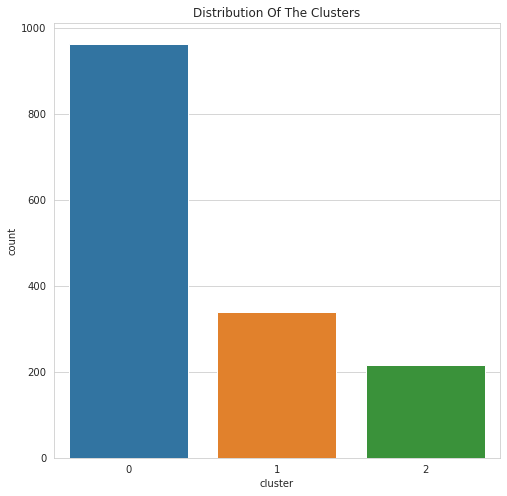

In [482]:
pl = sns.countplot(x=X["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [483]:
print(X_scaled)

[[ 0.35816426 -0.32174162 -0.62184186 ...  1.25437587  0.1798595
  -0.90821931]
 [-0.98713017 -0.32174162 -0.09789528 ... -1.30259953  0.1798595
  -0.58895628]
 [ 1.17423306  1.18301917 -0.62184186 ... -1.04690199  0.1798595
   0.68809585]
 ...
 [-0.45612884 -0.82332855  0.4260513  ...  1.16914336  0.1798595
  -1.06785083]
 [ 1.56495443  2.18619304  0.4260513  ...  1.59530593  2.56751406
   0.84772737]
 [ 0.80379561  0.17984531  0.4260513  ...  1.25437587  1.37368678
  -0.26969325]]


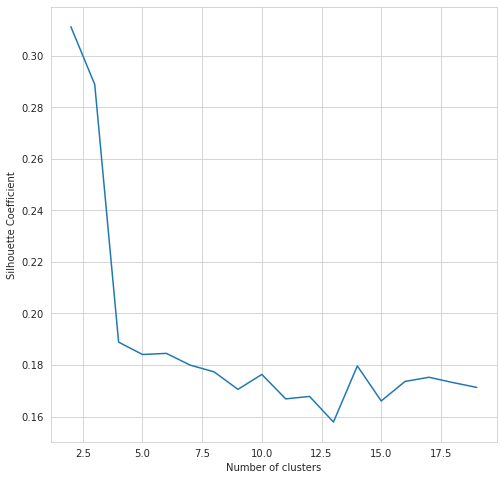

In [484]:
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(silhouette_score(X_scaled, km.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

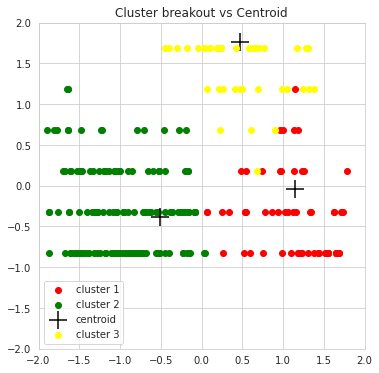

In [485]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_scaled[km.labels_ == 0, 0], X_scaled[km.labels_ == 0, 1],
            c='r', label='cluster 1')
plt.scatter(X_scaled[km.labels_ == 1, 0], X_scaled[km.labels_ == 1, 1],
            c='g', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', s=300,
            c='Black', label='centroid')
plt.scatter(X_scaled[km.labels_ == 2, 0], X_scaled[km.labels_ == 2, 1],
            c='Yellow', label='cluster 3')
#plt.scatter(X_scaled[km.labels_ == 3, 0], X_scaled[km.labels_ == 3, 1],
            #c='Blue', label='cluster 4')
plt.legend()
plt.title("Cluster breakout vs Centroid")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
ax.set_aspect('equal')

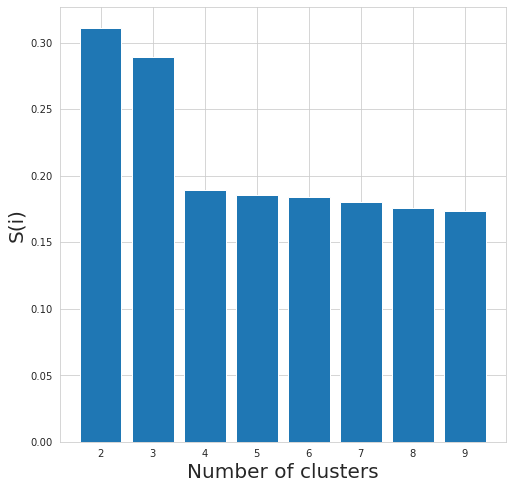

In [486]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, m1.fit_predict(X_scaled))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [487]:
silhouette_scores

[0.31127496847011726,
 0.2888543558254661,
 0.189056162137446,
 0.18534648047542565,
 0.18376590640940915,
 0.18001192005760755,
 0.17595424116009548,
 0.1736632507137539]

In [488]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.

sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


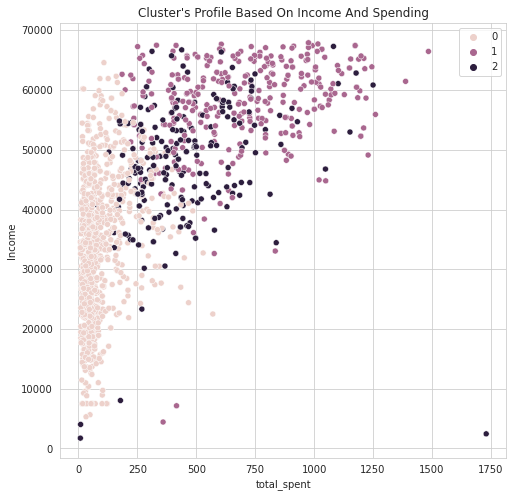

In [489]:
pl = sns.scatterplot(data = df2,x=df2["total_spent"], y=df2["Income"],hue=X["cluster"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [1337]:
#pickle model
with open("model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

In [1338]:
# pickle dataframe

filename = open('df.pkl', 'wb')
pickle.dump(df2, filename)
filename.close()

df.to_csv('df.csv', index=False)

In [1339]:
# pickle ss
filename = open('scaler.pkl', 'wb')
pickle.dump(scaler, filename)
filename.close()

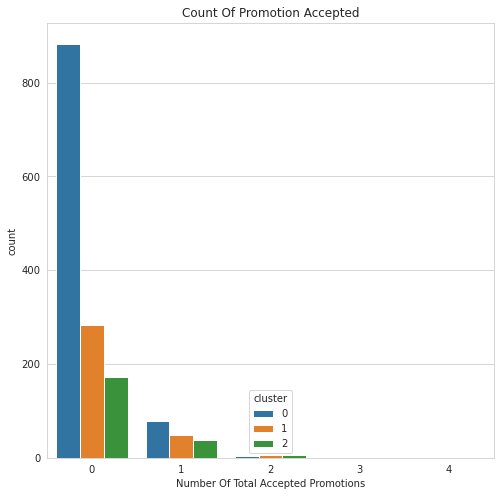

In [424]:
# Clusters interpretation
plt.figure()
pl = sns.countplot(x=df2["total_promo"],hue=X["cluster"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

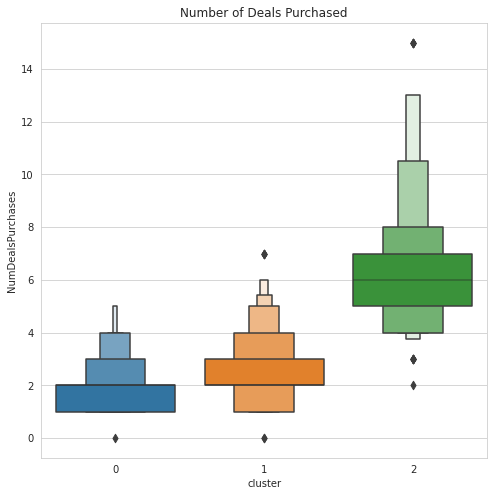

In [425]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df2["NumDealsPurchases"],x=X["cluster"])
pl.set_title("Number of Deals Purchased")
plt.show()

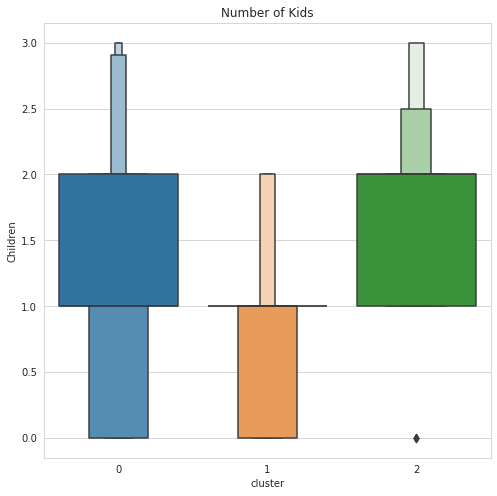

In [502]:
#Plotting the number of kids
plt.figure()
pl=sns.boxenplot(y=df2["Children"],x=X["cluster"])
pl.set_title("Number of Kids")
plt.show()

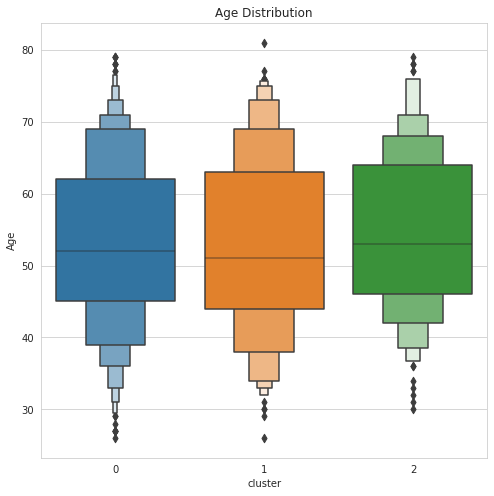

In [504]:
# Age distribution 
plt.figure()
pl=sns.boxenplot(y=df2["Age"],x=X["cluster"])
pl.set_title("Age Distribution")
plt.show()

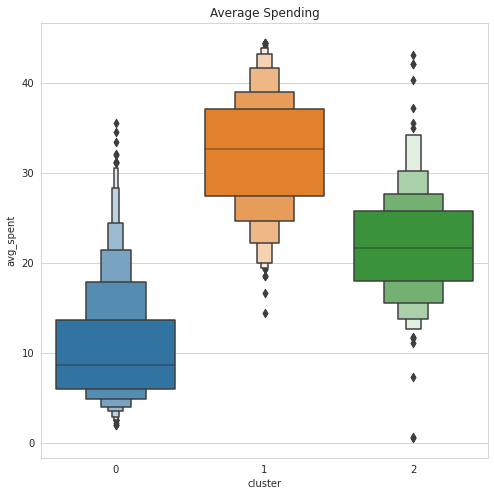

In [505]:
# Average Spending
plt.figure()
pl=sns.boxenplot(y=df2["avg_spent"],x=X["cluster"])
pl.set_title("Average Spending")
plt.show()

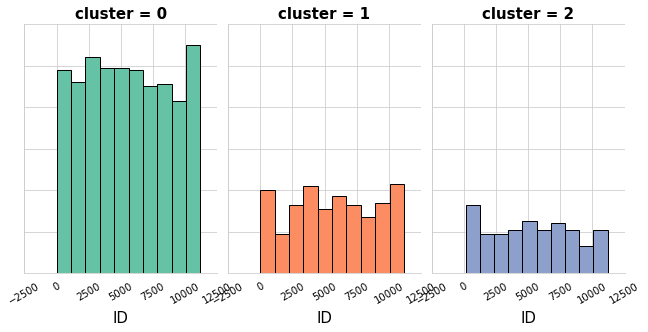

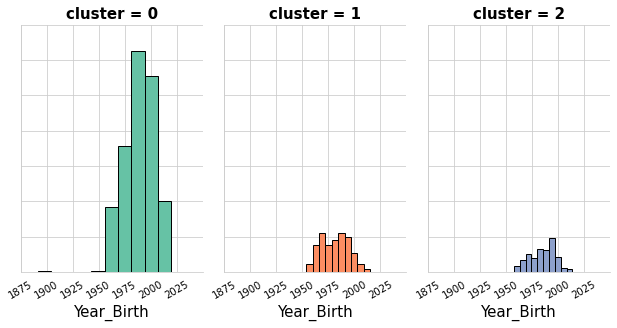

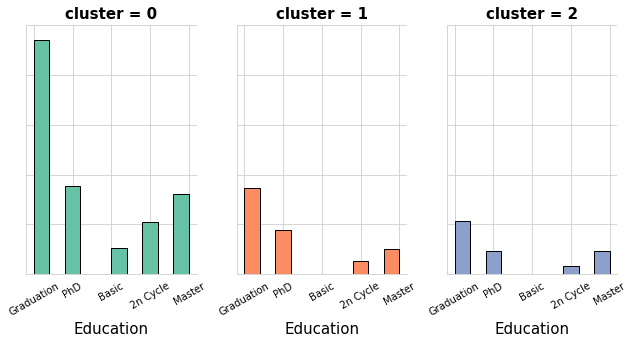

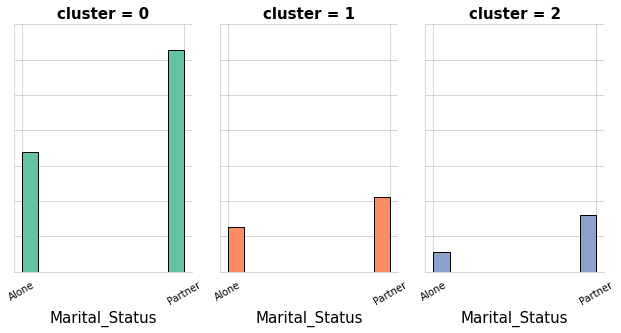

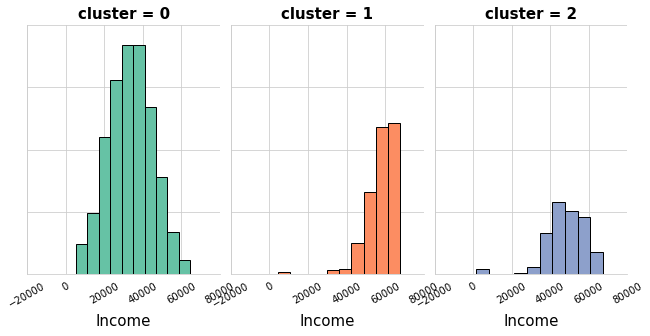

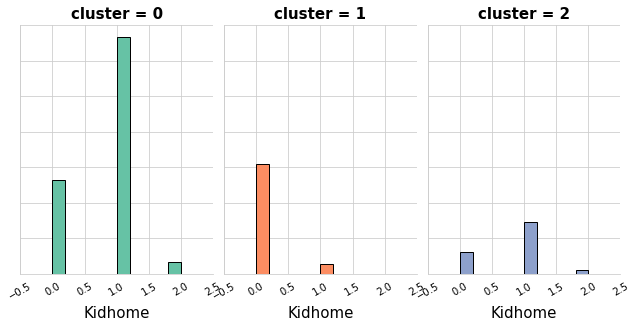

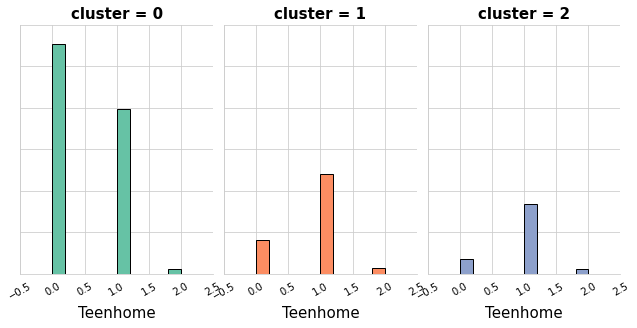

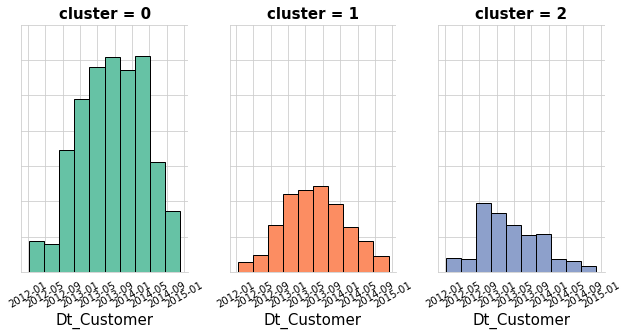

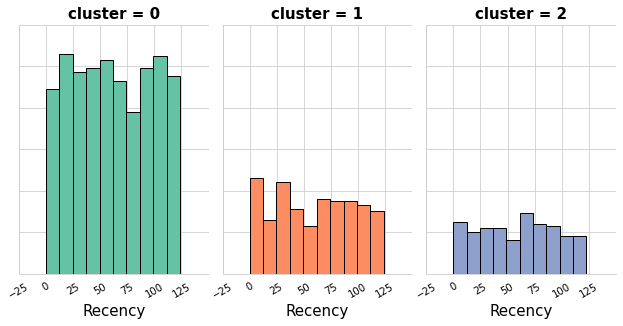

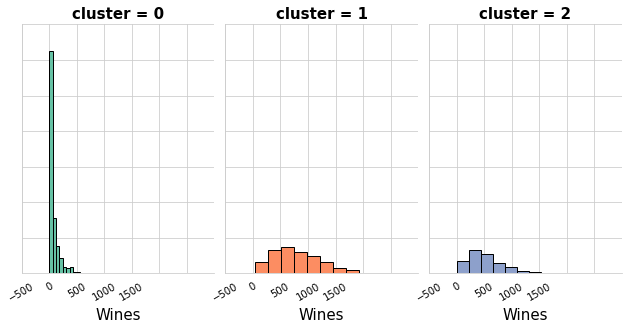

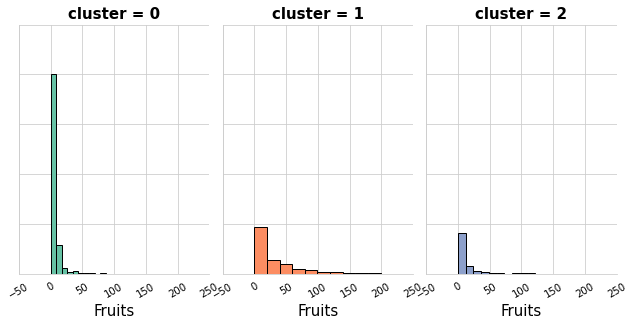

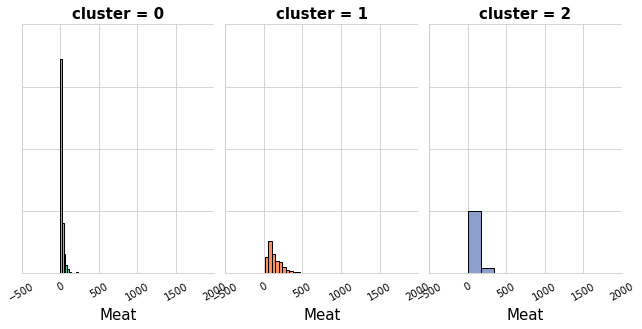

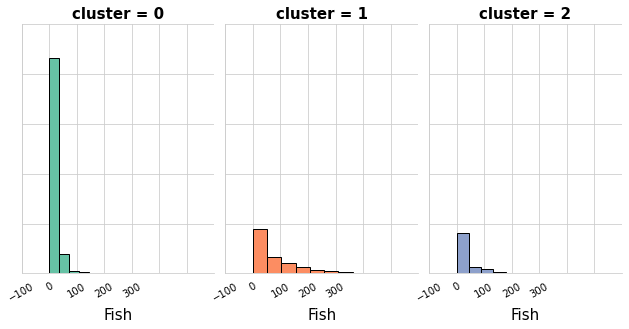

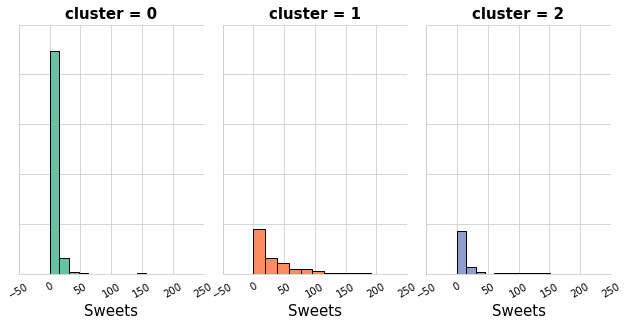

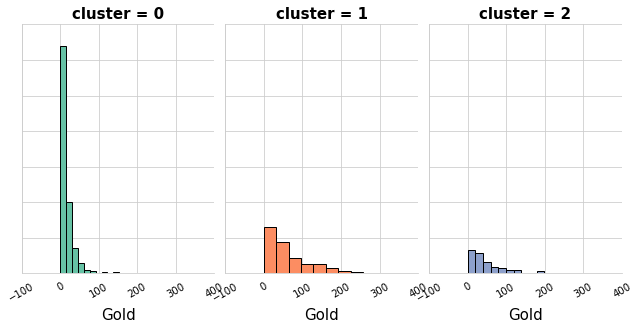

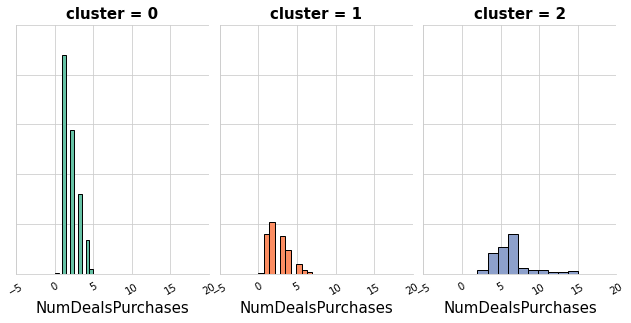

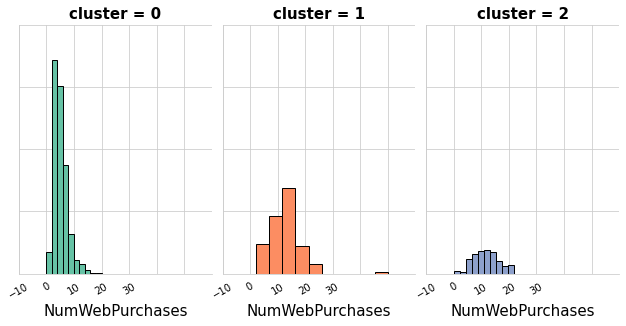

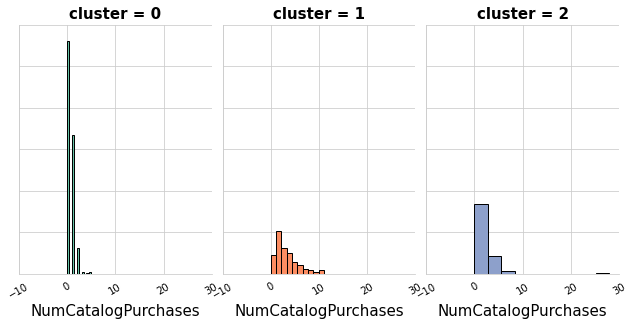

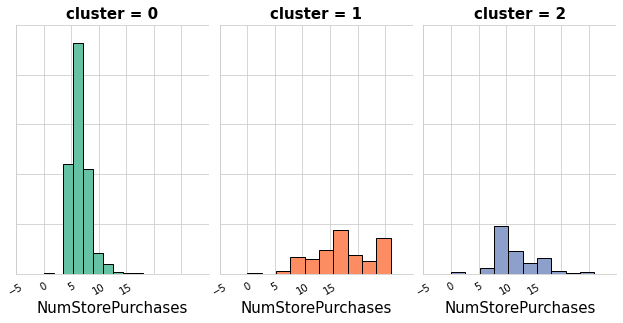

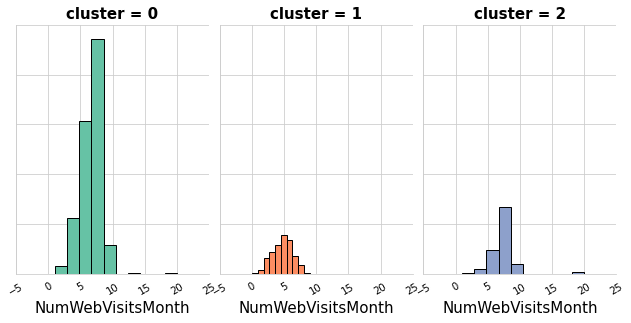

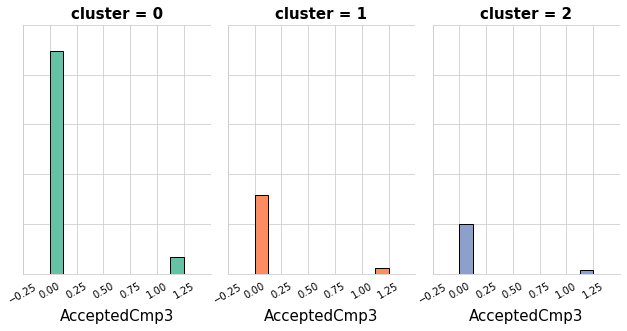

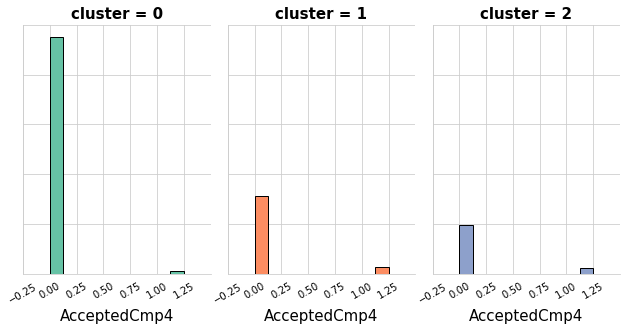

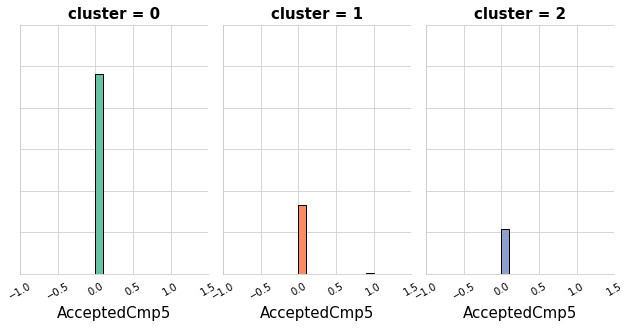

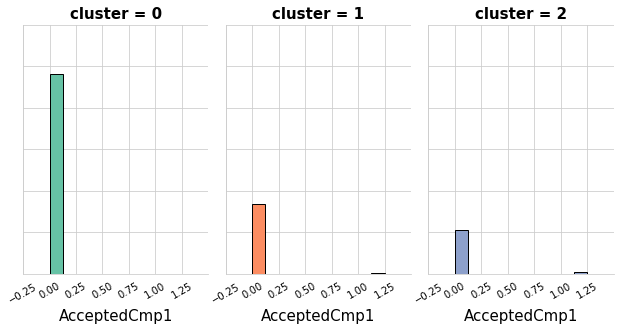

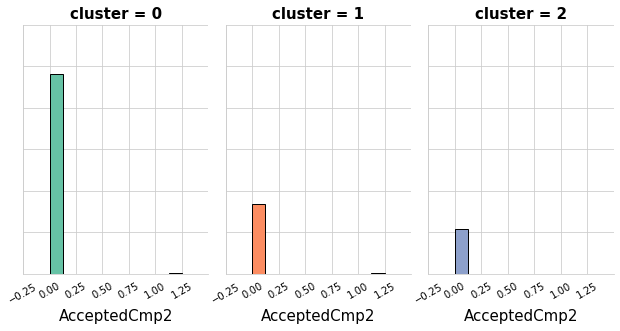

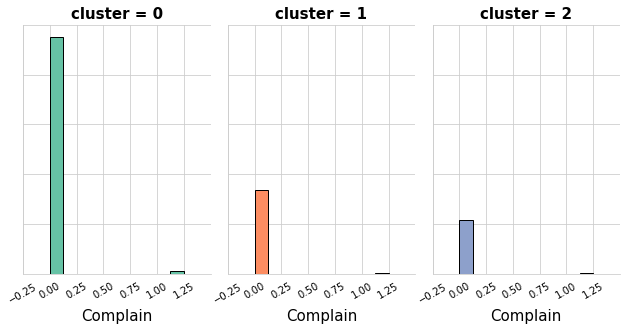

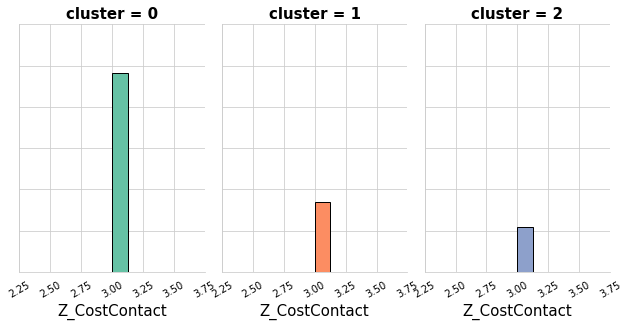

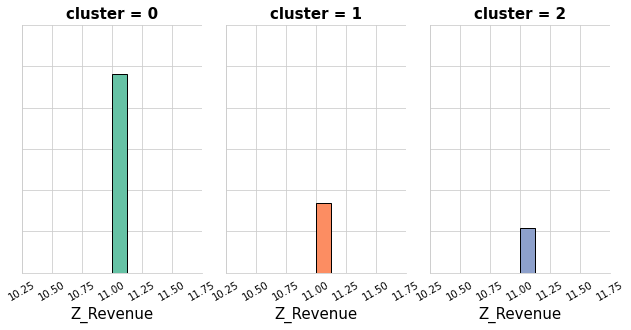

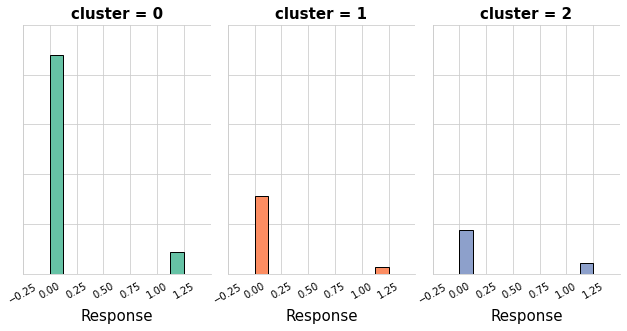

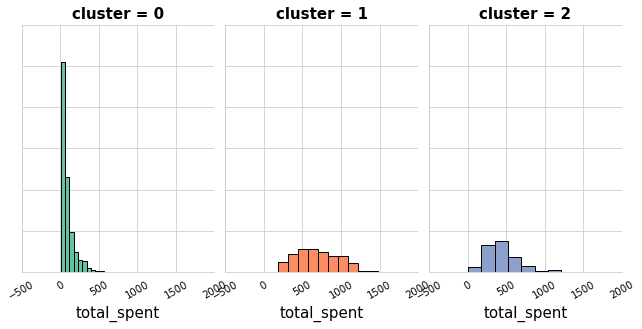

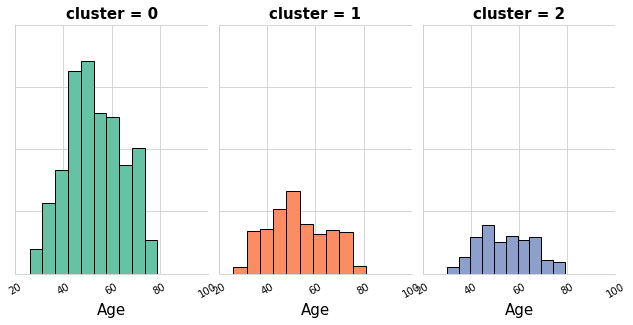

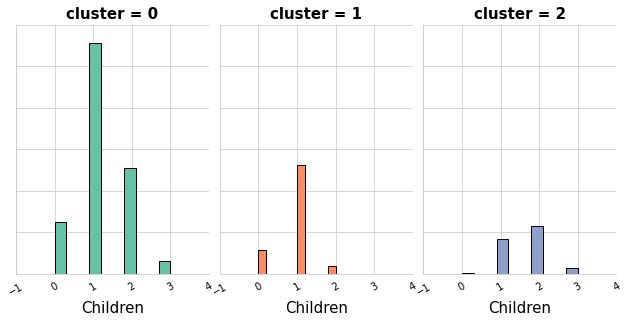

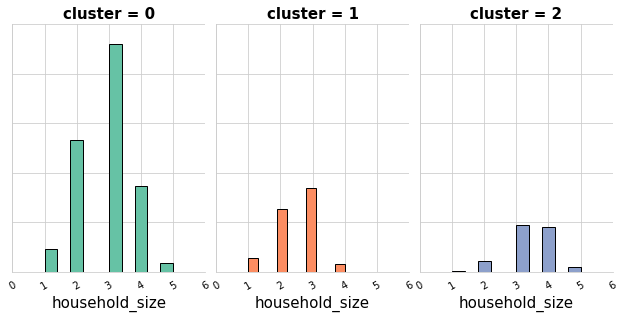

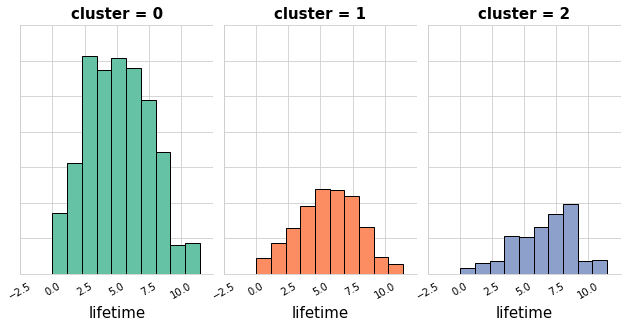

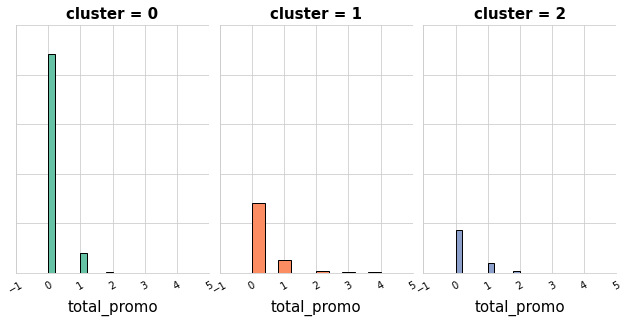

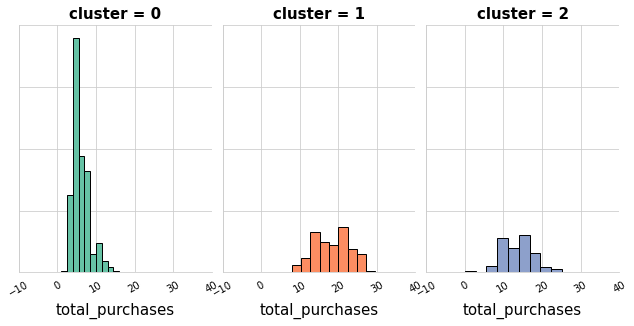

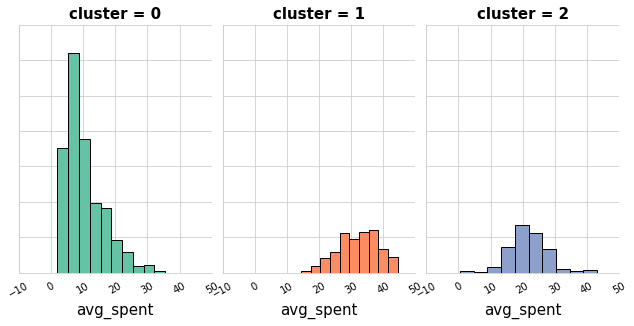

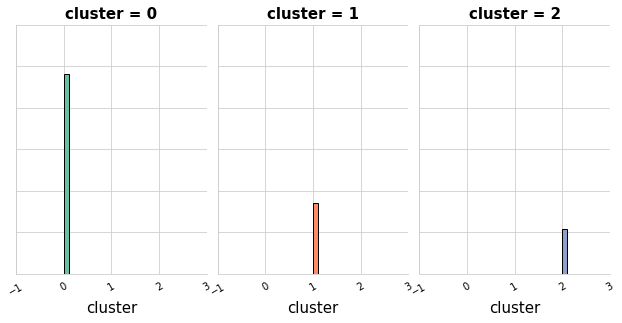

In [431]:

df2['cluster'] = X['cluster']
for i in df2:
    g = sns.FacetGrid(df2, col = "cluster", hue = "cluster", palette = "Set2")
    
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'black')
    g.set_yticklabels(color = 'black')
    g.set_xlabels(size=15, color = 'black')
    g.set_titles(size=15, color = 'black', fontweight="bold")
    g.fig.set_figheight(5)

#Findings
Cluster 0 - Low Intent
Low Spending, across all income bracket
Low Deals Purchases 
Kids
Cluster 1 - High Intent
High Spending, High Income 
Medium Deals Purchases 
No Kids
Slightly Younger Demographic
Cluster 2 - Medium Intent
Medium Spending, medium bracket
High Deals Purchases 
Kids
Older Demographic 
Bigger household size 


In [ ]:
#Next Steps / Limitation